Importing python packages

In [37]:
!pip install numpy
!pip install MDAnalysis
import numpy as np
import MDAnalysis as mda

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Load the trajectory of the files

In [39]:
u3 = mda.Universe("E22G\\MD.gro", "E22G\\3uMD2_noPBC.xtc")
u1 = mda.Universe("E22G\\MD.gro", "E22G\\3uMDnoPBC.xtc")
u2 = mda.Universe("E22G\\MD.gro", "E22G\\3uMD3_noPBC.xtc")

In [40]:
#u3 = mda.Universe("MD2.gro", "WT3uMD3_noPBC")
#u1 = mda.Universe("MD2.gro", "WT3uMDnoPBC")
#u2 = mda.Universe("MD2.gro", "WT3uMD2_noPBC")

Define the  atom selections for the benzene ring in Phe19, Phe 20, Tyr10 and Phe4 and the H atom in N-H bond of Gly22/Glu22


In [41]:
# the following label is used to select the benzene ring in VMD too -> resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG)
benzene_atoms20 = u1.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms19 = u1.select_atoms("(resid 19 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms10 = u1.select_atoms("(resid 10 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms04 = u1.select_atoms("(resid 4 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u1.select_atoms("(resid 22 and name N)")

In [66]:
angles = []
dist = []
#centroids=[]
#output = {}
rows = []
rows_Res20 = []
hist20 ={'3':0 , '3.5':0 , '4':0 ,'4.5':0 , '5':0 ,'5.5':0 , '6':0 }

Loop through each frame and get the coordinates for each of them, calculate the coordinates for the centroid of the ary interaction and find the distance and angle for each of the centroid and H-N of residue 22

In [78]:
benzene_atoms20 = u1.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms19 = u1.select_atoms("(resid 19 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms10 = u1.select_atoms("(resid 10 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms04 = u1.select_atoms("(resid 4 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u1.select_atoms("(resid 22 and name N)")#using position of N from N-H instead of H
angles = []
dist = []
rows = []
rows_Res20 = []
for ts in u1.trajectory:
  i=1
  b20=benzene_atoms20.positions
  b19=benzene_atoms19.positions
  b10=benzene_atoms10.positions
  b04=benzene_atoms04.positions
  h22=H_atom.positions
  # Calculate the centroid of the benzene ring
  c20 = np.mean(b20, axis=0)
  c19 = np.mean(b19, axis=0)
  c10 = np.mean(b10, axis=0)
  c04 = np.mean(b04, axis=0)
  #calculate the vector
  v20_h=h22-c20
  v19_h=h22-c19
  v10_h=h22-c10
  v04_h=h22-c04
  # Calculate the distance between the centroid and the H atom
  dist20 = np.linalg.norm(v20_h)
  dist19 = np.linalg.norm(v19_h)
  dist10 = np.linalg.norm(v10_h)
  dist04 = np.linalg.norm(v04_h)

  #Calculate the normal vector to the benzene ring plane
  vector1_20 = b20[1] - b20[0]
  vector2_20 = b20[2] - b20[1]
  vector1_10 = b10[1] - b10[0]
  vector2_10 = b10[2] - b10[1]
  vector1_19 = b19[1] - b19[0]
  vector2_19 = b19[2] - b19[1]
  vector1_04 = b04[1] - b04[0]
  vector2_04 = b04[2] - b04[1]
  normal_vector20 = np.cross(vector1_20, vector2_20)
  normal_vector19 = np.cross(vector1_19, vector2_19)
  normal_vector10 = np.cross(vector1_10, vector2_10)
  normal_vector04 = np.cross(vector1_04, vector2_04)

  # Normalize the normal vector
  normal_vector20 /= np.linalg.norm(normal_vector20)
  normal_vector19 /= np.linalg.norm(normal_vector19)
  normal_vector10 /= np.linalg.norm(normal_vector10)
  normal_vector04 /= np.linalg.norm(normal_vector04)

  # Calculate the angle between the normal vector and the vector from centroid to H atom
  #20
  # dot_product20 = np.dot(v20_h, normal_vector20)
  # magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(normal_vector20)
  # angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  # angle_deg20 = np.degrees(angle_rad20)
  # #19
  # dot_product19 = np.dot(v20_h, normal_vector19)
  # magnitude_product19 = np.linalg.norm(v19_h) * np.linalg.norm(normal_vector19)
  # angle_rad19 = np.arccos(dot_product19 / magnitude_product19)
  # angle_deg19 = np.degrees(angle_rad19)


  # Calculate the angle between the vector from centroid to H atom and a reference vector passing through centroid(e.g., [1,0,0])
  reference_vector20 = normal_vector20
  reference_vector19 = normal_vector19
  reference_vector10 = normal_vector10
  reference_vector04 = normal_vector04

  # Calculate the angle between the vector from centroid to H atom and a reference vector passing through centroid(e.g., [1,0,0])
  dot_product20 = np.dot(v20_h, reference_vector20)
  dot_product19 = np.dot(v19_h, reference_vector19)
  dot_product10 = np.dot(v10_h, reference_vector10)
  dot_product04 = np.dot(v04_h, reference_vector04)
  magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(reference_vector20)
  magnitude_product19 = np.linalg.norm(v19_h) * np.linalg.norm(reference_vector19)
  magnitude_product10 = np.linalg.norm(v10_h) * np.linalg.norm(reference_vector10)
  magnitude_product04 = np.linalg.norm(v04_h) * np.linalg.norm(reference_vector04)
  angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  angle_rad19 = np.arccos(dot_product19 / magnitude_product19)
  angle_rad10 = np.arccos(dot_product10 / magnitude_product10)
  angle_rad04 = np.arccos(dot_product04 / magnitude_product04)
  angle_deg20 = np.degrees(angle_rad20)
  angle_deg19 = np.degrees(angle_rad19)
  angle_deg10 = np.degrees(angle_rad10)
  angle_deg04 = np.degrees(angle_rad04)
  Res20=[dist20, angle_deg20]
  Res19=[dist19, angle_deg19]
  Res10=[dist10, angle_deg10]
  Res04=[dist04, angle_deg04]
  #print(Res20)

  rows.append({#
    'Residue_20_dist': dist20,
    'Residue_20_angle': angle_deg20[0],
    'Residue_19_dist': dist19,
    'Residue_19_angle': angle_deg19[0],
                'Residue_10_dist': dist10,
    'Residue_10_angle': angle_deg10[0],
                'Residue_04_dist': dist04,
    'Residue_04_angle': angle_deg04[0],
  })

  if dist20 <=5 and (angle_deg20[0] <=60 or angle_deg20[0] >=120):
    rows_Res20.append({
        'Residue_20_dist': dist20,
        'Residue_20_angle': angle_deg20[0]
        })
    if dist20 <= 3:
      temp = hist20['3']
      hist20['3'] = temp + 1
      temp = 0
      #print(hist20)
    elif dist20 > 3 and dist20 <=3.5 :
      temp = hist20['3.5']
      hist20['3.5'] = temp + 1
      temp = 0
    elif dist20 > 3.5 and dist20 <=4 :
      temp = hist20['4']
      hist20['4'] = temp + 1
      temp = 0
    elif dist20 > 4 and dist20 <=4.5 :
      temp = hist20['4.5']
      hist20['4.5'] = temp + 1
      temp = 0
    elif dist20 > 4.5 and dist20 <=5 :
      temp = hist20['5']
      hist20['5'] = temp + 1
      temp = 0

df1=pd.DataFrame(rows_Res20)
df1_all=pd.DataFrame(rows)

Repeat for u2 and u3

In [79]:
# the following label is used to select the benzene ring in VMD too -> resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG)
benzene_atoms20 = u2.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms19 = u2.select_atoms("(resid 19 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms10 = u2.select_atoms("(resid 10 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms04 = u2.select_atoms("(resid 4 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u2.select_atoms("(resid 22 and name N)")#using position of N from N-H instead of H
angles = []
dist = []
rows = []
rows_Res20 = []
for ts in u2.trajectory:
  i=1
  b20=benzene_atoms20.positions
  b19=benzene_atoms19.positions
  b10=benzene_atoms10.positions
  b04=benzene_atoms04.positions
  h22=H_atom.positions
  # Calculate the centroid of the benzene ring
  c20 = np.mean(b20, axis=0)
  c19 = np.mean(b19, axis=0)
  c10 = np.mean(b10, axis=0)
  c04 = np.mean(b04, axis=0)
  #calculate the vector
  v20_h=h22-c20
  v19_h=h22-c19
  v10_h=h22-c10
  v04_h=h22-c04
  # Calculate the distance between the centroid and the H atom
  dist20 = np.linalg.norm(v20_h)
  dist19 = np.linalg.norm(v19_h)
  dist10 = np.linalg.norm(v10_h)
  dist04 = np.linalg.norm(v04_h)

  #Calculate the normal vector to the benzene ring plane
  vector1_20 = b20[1] - b20[0]
  vector2_20 = b20[2] - b20[1]
  vector1_10 = b10[1] - b10[0]
  vector2_10 = b10[2] - b10[1]
  vector1_19 = b19[1] - b19[0]
  vector2_19 = b19[2] - b19[1]
  vector1_04 = b04[1] - b04[0]
  vector2_04 = b04[2] - b04[1]
  normal_vector20 = np.cross(vector1_20, vector2_20)
  normal_vector19 = np.cross(vector1_19, vector2_19)
  normal_vector10 = np.cross(vector1_10, vector2_10)
  normal_vector04 = np.cross(vector1_04, vector2_04)

  # Normalize the normal vector
  normal_vector20 /= np.linalg.norm(normal_vector20)
  normal_vector19 /= np.linalg.norm(normal_vector19)
  normal_vector10 /= np.linalg.norm(normal_vector10)
  normal_vector04 /= np.linalg.norm(normal_vector04)

  # Calculate the angle between the vector from centroid to H atom and a reference vector passing through centroid(e.g., [1,0,0])
  reference_vector20 = normal_vector20
  reference_vector19 = normal_vector19
  reference_vector10 = normal_vector10
  reference_vector04 = normal_vector04

  # Calculate the angle between the vector from centroid to H atom and a reference vector passing through centroid(e.g., [1,0,0])
  dot_product20 = np.dot(v20_h, reference_vector20)
  dot_product19 = np.dot(v19_h, reference_vector19)
  dot_product10 = np.dot(v10_h, reference_vector10)
  dot_product04 = np.dot(v04_h, reference_vector04)
  magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(reference_vector20)
  magnitude_product19 = np.linalg.norm(v19_h) * np.linalg.norm(reference_vector19)
  magnitude_product10 = np.linalg.norm(v10_h) * np.linalg.norm(reference_vector10)
  magnitude_product04 = np.linalg.norm(v04_h) * np.linalg.norm(reference_vector04)
  angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  angle_rad19 = np.arccos(dot_product19 / magnitude_product19)
  angle_rad10 = np.arccos(dot_product10 / magnitude_product10)
  angle_rad04 = np.arccos(dot_product04 / magnitude_product04)
  angle_deg20 = np.degrees(angle_rad20)
  angle_deg19 = np.degrees(angle_rad19)
  angle_deg10 = np.degrees(angle_rad10)
  angle_deg04 = np.degrees(angle_rad04)
  Res20=[dist20, angle_deg20]
  Res19=[dist19, angle_deg19]
  Res10=[dist10, angle_deg10]
  Res04=[dist04, angle_deg04]
  #print(Res20)

  rows.append({#
    'Residue_20_dist': dist20,
    'Residue_20_angle': angle_deg20[0],
    'Residue_19_dist': dist19,
    'Residue_19_angle': angle_deg19[0],
                'Residue_10_dist': dist10,
    'Residue_10_angle': angle_deg10[0],
                'Residue_04_dist': dist04,
    'Residue_04_angle': angle_deg04[0],
  })

  if dist20 <=5 and (angle_deg20[0] <=60 or angle_deg20[0] >=120):
    rows_Res20.append({
        'Residue_20_dist': dist20,
        'Residue_20_angle': angle_deg20[0]
        })
    if dist20 <= 3:
      temp = hist20['3']
      hist20['3'] = temp + 1
      temp = 0
      #print(hist20)
    elif dist20 > 3 and dist20 <=3.5 :
      temp = hist20['3.5']
      hist20['3.5'] = temp + 1
      temp = 0
    elif dist20 > 3.5 and dist20 <=4 :
      temp = hist20['4']
      hist20['4'] = temp + 1
      temp = 0
    elif dist20 > 4 and dist20 <=4.5 :
      temp = hist20['4.5']
      hist20['4.5'] = temp + 1
      temp = 0
    elif dist20 > 4.5 and dist20 <=5 :
      temp = hist20['5']
      hist20['5'] = temp + 1
      temp = 0

df2=pd.DataFrame(rows_Res20)
df2_all=pd.DataFrame(rows)
#u3
benzene_atoms20 = u3.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms19 = u3.select_atoms("(resid 19 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms10 = u3.select_atoms("(resid 10 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms04 = u3.select_atoms("(resid 4 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u3.select_atoms("(resid 22 and name N)") #using position of N from N-H instead of H
angles = []
dist = []
rows = []
rows_Res20 = []
for ts in u3.trajectory:
  i=1
  b20=benzene_atoms20.positions
  b19=benzene_atoms19.positions
  b10=benzene_atoms10.positions
  b04=benzene_atoms04.positions
  h22=H_atom.positions
  # Calculate the centroid of the benzene ring
  c20 = np.mean(b20, axis=0)
  c19 = np.mean(b19, axis=0)
  c10 = np.mean(b10, axis=0)
  c04 = np.mean(b04, axis=0)

  #calculate the vector
  v20_h=h22-c20
  v19_h=h22-c19
  v10_h=h22-c10
  v04_h=h22-c04

  #print(c20, ' ', v20_h)
  # Calculate the distance between the centroid and the H atom
  dist20 = np.linalg.norm(v20_h)
  dist19 = np.linalg.norm(v19_h)
  dist10 = np.linalg.norm(v10_h)
  dist04 = np.linalg.norm(v04_h)

  #Calculate the normal vector to the benzene ring plane
  vector1_20 = b20[1] - b20[0]
  vector2_20 = b20[2] - b20[1]
  vector1_10 = b10[1] - b10[0]
  vector2_10 = b10[2] - b10[1]
  vector1_19 = b19[1] - b19[0]
  vector2_19 = b19[2] - b19[1]
  vector1_04 = b04[1] - b04[0]
  vector2_04 = b04[2] - b04[1]
  normal_vector20 = np.cross(vector1_20, vector2_20)
  normal_vector19 = np.cross(vector1_19, vector2_19)
  normal_vector10 = np.cross(vector1_10, vector2_10)
  normal_vector04 = np.cross(vector1_04, vector2_04)

  # Normalize the normal vector
  normal_vector20 /= np.linalg.norm(normal_vector20)
  normal_vector19 /= np.linalg.norm(normal_vector19)
  normal_vector10 /= np.linalg.norm(normal_vector10)
  normal_vector04 /= np.linalg.norm(normal_vector04)

  # Calculate the angle between the vector from centroid to H atom and a reference vector passing through centroid(e.g., [1,0,0])
  reference_vector20 = normal_vector20
  reference_vector19 = normal_vector19
  reference_vector10 = normal_vector10
  reference_vector04 = normal_vector04

  # Calculate the angle between the vector from centroid to H atom and a reference vector (e.g., [1,0,0])
  dot_product20 = np.dot(v20_h, reference_vector20)
  dot_product19 = np.dot(v19_h, reference_vector19)
  dot_product10 = np.dot(v10_h, reference_vector10)
  dot_product04 = np.dot(v04_h, reference_vector04)
  magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(reference_vector20)
  magnitude_product19 = np.linalg.norm(v19_h) * np.linalg.norm(reference_vector19)
  magnitude_product10 = np.linalg.norm(v10_h) * np.linalg.norm(reference_vector10)
  magnitude_product04 = np.linalg.norm(v04_h) * np.linalg.norm(reference_vector04)
  angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  angle_rad19 = np.arccos(dot_product19 / magnitude_product19)
  angle_rad10 = np.arccos(dot_product10 / magnitude_product10)
  angle_rad04 = np.arccos(dot_product04 / magnitude_product04)
  angle_deg20 = np.degrees(angle_rad20)
  angle_deg19 = np.degrees(angle_rad19)
  angle_deg10 = np.degrees(angle_rad10)
  angle_deg04 = np.degrees(angle_rad04)
  Res20=[dist20, angle_deg20]
  Res19=[dist19, angle_deg19]
  Res10=[dist10, angle_deg10]
  Res04=[dist04, angle_deg04]
  #print(Res20)

  rows.append({#
    'Residue_20_dist': dist20,
    'Residue_20_angle': angle_deg20[0],
    'Residue_19_dist': dist19,
    'Residue_19_angle': angle_deg19[0],
                'Residue_10_dist': dist10,
    'Residue_10_angle': angle_deg10[0],
                'Residue_04_dist': dist04,
    'Residue_04_angle': angle_deg04[0],
  })
  #print(dist20, angle_deg20[0], angle_deg20)

  if dist20 <=5 and (angle_deg20[0] <=60 or angle_deg20[0] >=120):
    rows_Res20.append({
        'Residue_20_dist': dist20,
        'Residue_20_angle': angle_deg20[0]
        })
    if dist20 <= 3:
      temp = hist20['3']
      hist20['3'] = temp + 1
      temp = 0
      #print(hist20)
    elif dist20 > 3 and dist20 <=3.5 :
      temp = hist20['3.5']
      hist20['3.5'] = temp + 1
      temp = 0
    elif dist20 > 3.5 and dist20 <=4 :
      temp = hist20['4']
      hist20['4'] = temp + 1
      temp = 0
    elif dist20 > 4 and dist20 <=4.5 :
      temp = hist20['4.5']
      hist20['4.5'] = temp + 1
      temp = 0
    elif dist20 > 4.5 and dist20 <=5 :
      temp = hist20['5']
      hist20['5'] = temp + 1
      temp = 0

df3=pd.DataFrame(rows_Res20)
df3_all=pd.DataFrame(rows)
print(c20, ' ', v20_h)


[70.920006 19.931667 35.14    ]   [[-5.989998  -3.9016666 -3.9899979]]


In [45]:
#df1 = pd.DataFrame(rows)
#df2 = pd.DataFrame(rows_Res20)
#print(hist20)

To understand the distribution of the angles and the bond length of residue 20 a scatter plot was generated for the diffent run

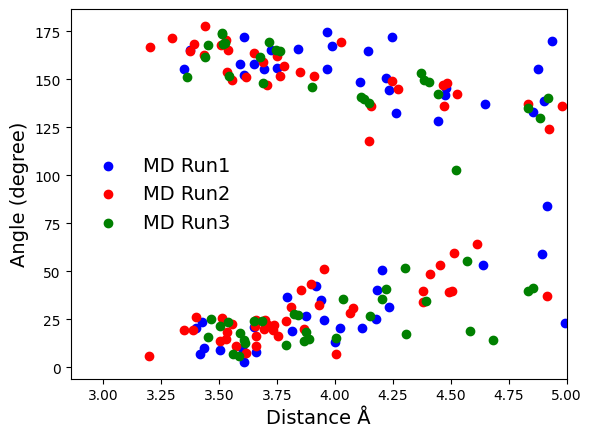

In [72]:
plt.scatter(df1_all['Residue_20_dist'], df1_all['Residue_20_angle'], color='b', edgecolors='b', label='MD Run1')
plt.scatter(df2_all['Residue_20_dist'], df2_all['Residue_20_angle'],color='r',edgecolors='r', label='MD Run2')
plt.scatter(df3_all['Residue_20_dist'], df3_all['Residue_20_angle'],color='g',edgecolors='g', label='MD Run3')

# plt.scatter(df1_all['Residue_19_dist'], df1_all['Residue_19_angle'], color='b',edgecolors='b')
# plt.scatter(df2_all['Residue_19_dist'], df2_all['Residue_19_angle'],color='r', edgecolors='r')
# plt.scatter(df3_all['Residue_19_dist'], df3_all['Residue_19_angle'],color='g', edgecolors='g')

plt.xlabel('Distance Å', fontdict={'family': 'DejaVu Sans', 'size': 14})
plt.xlim(right=5)
plt.ylabel('Angle (degree)', fontdict={'family': 'DejaVu Sans', 'size': 14})
plt.legend(frameon=False, prop={'family': 'DejaVu Sans', 'size': 14})
plt.savefig('scatter.png', dpi=600)
plt.show()


Plotting disjointed histogram

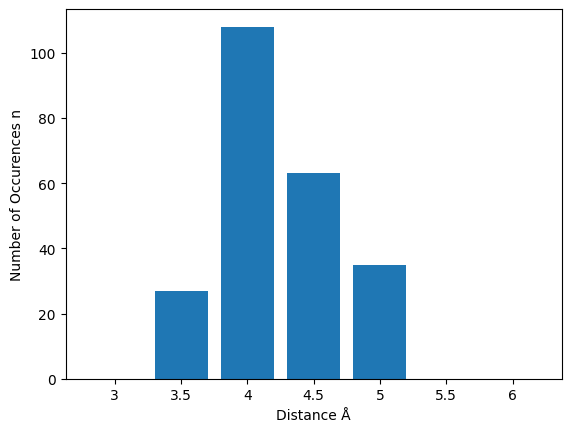

{'3': 0, '3.5': 27, '4': 108, '4.5': 63, '5': 35, '5.5': 0, '6': 0}

In [73]:
#Plot histogram
plt.bar(hist20.keys() , hist20.values())
plt.xlabel('Distance Å')
plt.ylabel('Number of Occurences n')
plt.show()
hist20


In [74]:
df3['Residue_20_dist']

0     4.302652
1     3.821972
2     4.202617
3     3.651454
4     3.868045
5     4.834505
6     4.003883
7     4.152853
8     3.683150
9     3.464328
10    3.887299
11    4.835020
12    3.587465
13    4.032568
14    3.842179
15    3.510456
16    3.745305
17    3.899847
18    4.443103
19    3.450083
20    3.691048
21    3.559660
22    3.789224
23    4.219220
24    3.362838
25    3.540569
26    4.125371
27    4.112785
28    3.504717
29    3.608199
30    4.391855
31    3.588810
32    3.439587
33    3.516424
34    4.146374
35    3.763979
36    4.403920
37    4.919910
38    4.384310
39    4.583228
40    3.676858
41    4.883702
42    4.853532
43    4.305669
44    3.713433
45    3.873514
46    3.612334
47    4.684174
48    3.513240
49    4.372664
50    3.538798
51    3.526055
52    4.570077
53    4.522051
54    3.451000
Name: Residue_20_dist, dtype: float32

Plotting a continuous histogram

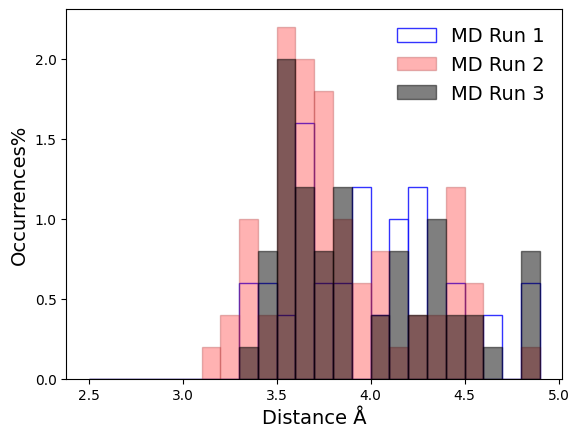

9.8 13.399999999999999 14.6
11.266666666666666
1.5434449203720293
49 67 73
133.66666666666666
7.717224601860151


In [ ]:
bin_edges = np.arange(2.5, 5.0, 0.1)
#print(rows_Res20)
# Calculate histogram
hist_df1, _ = np.histogram(df1['Residue_20_dist'], bins=bin_edges)
hist_df1_percentage = hist_df1 / 500 * 100  # Convert to percentage


hist_df2, _ = np.histogram(df2['Residue_20_dist'], bins=bin_edges)
hist_df2_percentage = hist_df2 / 500 * 100  # Convert to percentage
hist_df3, _ = np.histogram(df3['Residue_20_dist'], bins=bin_edges)

hist_df3_percentage = hist_df3 / 500 * 100  # Convert to percentage
# Plot histogram
plt.bar(bin_edges[:-1], hist_df1_percentage, width=0.1, align='edge', color='white', alpha=0.8, edgecolor='blue',hatch='', label='MD Run 1')
plt.bar(bin_edges[:-1], hist_df2_percentage, width=0.1, align='edge', color='red', alpha=0.3, edgecolor='brown', hatch='', label='MD Run 2')
plt.bar(bin_edges[:-1], hist_df3_percentage, width=0.1, align='edge', color='black', alpha=0.5, edgecolor='black',hatch='', label='MD Run 3')
plt.xlabel('Distance Å', fontdict={'family': 'DejaVu Sans', 'size': 14})
plt.ylabel('Occurrences%', fontdict={'family': 'DejaVu Sans', 'size': 14})
plt.legend(frameon=False, prop={'family': 'DejaVu Sans', 'size': 14})
plt.savefig('histogram.png', dpi=600)
plt.show()
print(np.sum(np.array(hist_df1_percentage)), np.sum(np.array(hist_df2_percentage)), (np.sum(np.array(hist_df3_percentage))))
mean_df1_percentage=np.sum(np.array(hist_df3_percentage)+np.array(hist_df2_percentage)+np.array(hist_df1_percentage))/3
print(mean_df1_percentage)
#stdandard deviation
std_df1_percentage = np.std([np.sum(np.array(hist_df3_percentage)), np.sum(np.array(hist_df2_percentage)), np.sum(np.array(hist_df1_percentage))])
print(std_df1_percentage)

print(np.sum(np.array(hist_df1)),np.sum(np.array(hist_df2)),(np.sum(np.array(hist_df3))))
mean_hist_df1=np.sum(np.array(hist_df1))+np.sum(np.array(hist_df2))+np.sum(np.array(hist_df3))/3
print(mean_hist_df1)
#standard deviation
std_hist_df1 = np.std([np.sum(np.array(hist_df3)), np.sum(np.array(hist_df2)), np.sum(np.array(hist_df1))])
print(std_hist_df1)


In [50]:
df2.to_csv('Run2.csv')
df1.to_csv('Run1.csv')
df3.to_csv('Run3.csv')

df2_all.to_csv('Run_All2.csv')
df1_all.to_csv('Run_All1.csv')
df3_all.to_csv('Run_All3.csv')


In [51]:
#print(output)

vector angle for c20

In [52]:
# the following label is used to select the benzene ring in VMD too -> resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG)
benzene_atoms20 = u2.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u2.select_atoms("(resid 22 and name N)")
angles = []
dist = []
rows = []
rows_Res20 = []
for ts in u2.trajectory:
  b20=benzene_atoms20.positions
  h22=H_atom.positions

  # Calculate the centroid of the benzene ring
  c20 = np.mean(b20, axis=0)

  #calculate the vector
  v20_h=h22-c20

  #Calculate the normal vector to the benzene ring plane
  vector1 = b20[1] - b20[0]
  vector2 = b20[2] - b20[1]
  normal_vector = np.cross(vector1, vector2)

  # Normalize the normal vector
  normal_vector /= np.linalg.norm(normal_vector)

  # Calculate the angle between the normal vector and the vector from centroid to H atom
  dot_product20 = np.dot(v20_h, normal_vector)
  magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(normal_vector)
  angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  angle_deg20 = np.degrees(angle_rad20)

  # Calculate the distance between the centroid and the H atom
  dist20 = np.linalg.norm(v20_h)

  # Calculate the angle between the vector from centroid to H atom and a reference vector (e.g., [1,0,0])
  #reference_vector = np.array([0, 1, 0])
  #dot_product20 = np.dot(v20_h, reference_vector)

  # magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(reference_vector)

  # angle_rad20 = np.arccos(dot_product20 / magnitude_product20)

  # angle_deg20 = np.degrees(angle_rad20)

  Res20=[dist20, angle_deg20, normal_vector, c20]

print(Res20)

[np.float32(8.830124), array([90.977165], dtype=float32), array([-0.24983925,  0.9682759 , -0.00471358], dtype=float32), array([77.045006, 27.56833 , 21.971666], dtype=float32)]


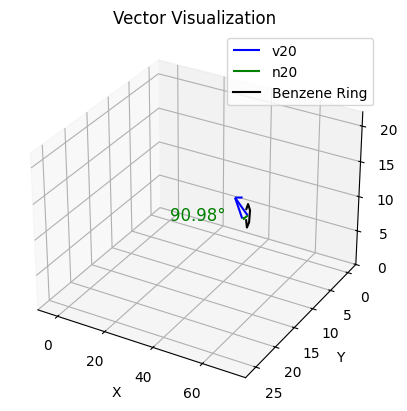

In [53]:
# Assuming you have calculated v20_h, angle_deg20, and dist20

# Define the reference vector
#reference_vector = np.array([0, 10, 0])

# Define the benzene ring coordinates (assuming b20 contains the coordinates)
benzene_ring_x = b20[:, 0]
benzene_ring_y = b20[:, 1]
benzene_ring_z = b20[:, 2]

# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reference vector
#ax.quiver(0, 0, 0, reference_vector[0], reference_vector[1], reference_vector[2], color='r', label='Reference Vector', arrow_length_ratio=0.6)

# Plot v20_h
v20_h_ = v20_h[0]
n20 = normal_vector
ax.quiver(c20[0], c20[1], c20[2], v20_h_[0], v20_h_[1], v20_h_[2], color='b', label='v20', arrow_length_ratio=0.6)
ax.quiver(c20[0], c20[1], c20[2], n20[0], n20[1], n20[2], color='g', label='n20')
# Plot the benzene ring
ax.plot(benzene_ring_x, benzene_ring_y, benzene_ring_z, color='black', label='Benzene Ring')

# Set plot limits and labels
ax.set_xlim([min(c20[0], 0, v20_h_[0]), max(c20[0], 0, v20_h_[0])])
ax.set_ylim([max(c20[1], 0, v20_h_[1]), min(c20[1], 0, v20_h_[1])])
ax.set_zlim([min(c20[2], 0, v20_h_[2]), max(c20[2], 0, v20_h_[2])])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot angle between vectors
angle_deg_scalar = angle_deg20.item()
ax.text(0, 0, 0, f'{angle_deg_scalar:.2f}°', color='g', fontsize=12)  # Display the angle between vectors

# Set title and legend
plt.title('Vector Visualization')
plt.legend()

# Show plot
plt.show()

To find the number of interactions between the C5 H bond [**The Realm of Unconventional Noncovalent Interactions in Proteins: Their Significance in Structure and Function**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10308531/#ref37)      [**A prevalent intraresidue hydrogen bond stabilizes proteins**](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5110370/) To work on this we need to start with finding the six Gly in AB40 E22G variant **G9, G22, G25 G29, G33, G37 and G38**

In [54]:
#for MD run1
hist_g1 ={'Gly9':0  , 'Gly25':0 ,'Gly29':0 , 'Gly33':0 ,'Gly37':0 , 'Gly38':0 , 'Gly22':0 }
g9_H=u1.select_atoms("(resid 9 and name H)")
g9_O=u1.select_atoms("(resid 9 and name O)")
g22_H=u1.select_atoms("(resid 22 and name H)")
g22_O=u1.select_atoms("(resid 22 and name O)")
g25_H=u1.select_atoms("(resid 25 and name H)")
g25_O=u1.select_atoms("(resid 25 and name O)")
g29_H=u1.select_atoms("(resid 29 and name H)")
g29_O=u1.select_atoms("(resid 29 and name O)")
g33_H=u1.select_atoms("(resid 33 and name H)")
g33_O=u1.select_atoms("(resid 33 and name O)")
g37_H=u1.select_atoms("(resid 37 and name H)")
g37_O=u1.select_atoms("(resid 37 and name O)")
g38_H=u1.select_atoms("(resid 38 and name H)")
g38_O=u1.select_atoms("(resid 38 and name O)")

dist = []
frame_count=0
for ts in u1.trajectory:
  frame_count+=1
  for g_H in g9_H,g22_H,g25_H,g29_H,g33_H,g38_H:
    gH=g_H.positions
    for g_O in g9_O,g22_O,g25_O,g29_O,g33_O,g38_O:
      gO=g_O.positions
      gC5_O_H=gO-gH #vector for the C5 hydrogen bonding in glycine
      d=np.linalg.norm(gC5_O_H)
      #oxygen–hydrogen distances <2.61 Å ref. in link,
      if d<2.61 :
        if g_H==g9_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'9',
              'dist': d})
          temp = hist_g1['Gly9']
          hist_g1['Gly9'] = temp + 1
        elif g_H==g25_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'25',
              'dist': d})
          temp = hist_g1['Gly25']
          hist_g1['Gly25'] = temp + 1
        elif g_H==g29_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'29',
              'dist': d})
          temp = hist_g1['Gly29']
          hist_g1['Gly29'] = temp + 1
        elif g_H==g33_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'33',
              'dist': d})
          temp = hist_g1['Gly33']
          hist_g1['Gly33'] = temp + 1
        elif g_H==g38_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'38',
              'dist': d})
          temp = hist_g1['Gly38']
          hist_g1['Gly38'] = temp + 1
        elif g_H==g22_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'22',
              'dist': d})
          temp = hist_g1['Gly22']
          hist_g1['Gly22'] = temp + 1

df_gly1=pd.DataFrame(dist)

#for MD run 2
hist_g2 ={'Gly9':0 , 'Gly25':0 ,'Gly29':0 , 'Gly33':0 ,'Gly37':0 , 'Gly38':0 , 'Gly22':0 }
g9_H=u2.select_atoms("(resid 9 and name H)")
g9_O=u2.select_atoms("(resid 9 and name O)")
g22_H=u2.select_atoms("(resid 22 and name H)")
g22_O=u2.select_atoms("(resid 22 and name O)")
g25_H=u2.select_atoms("(resid 25 and name H)")
g25_O=u2.select_atoms("(resid 25 and name O)")
g29_H=u2.select_atoms("(resid 29 and name H)")
g29_O=u2.select_atoms("(resid 29 and name O)")
g33_H=u2.select_atoms("(resid 33 and name H)")
g33_O=u2.select_atoms("(resid 33 and name O)")
g37_H=u2.select_atoms("(resid 37 and name H)")
g37_O=u2.select_atoms("(resid 37 and name O)")
g38_H=u2.select_atoms("(resid 38 and name H)")
g38_O=u2.select_atoms("(resid 38 and name O)")

dist = []
frame_count=0
for ts in u2.trajectory:
  frame_count+=1
  for g_H in g9_H,g22_H,g25_H,g29_H,g33_H,g38_H:
    gH=g_H.positions
    for g_O in g9_O,g22_O,g25_O,g29_O,g33_O,g38_O:
      gO=g_O.positions
      gC5_O_H=gO-gH #vector for the C5 hydrogen bonding in glycine
      d=np.linalg.norm(gC5_O_H)
      #oxygen–hydrogen distances <2.61 Å ref. in link,
      if d<2.61 :
        if g_H==g9_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'9',
              'dist': d})
          temp = hist_g2['Gly9']
          hist_g2['Gly9'] = temp + 1
        elif g_H==g25_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'25',
              'dist': d})
          temp = hist_g2['Gly25']
          hist_g2['Gly25'] = temp + 1
        elif g_H==g29_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'29',
              'dist': d})
          temp = hist_g2['Gly29']
          hist_g2['Gly29'] = temp + 1
        elif g_H==g33_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'33',
              'dist': d})
          temp = hist_g2['Gly33']
          hist_g2['Gly33'] = temp + 1
        elif g_H==g38_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'38',
              'dist': d})
          temp = hist_g2['Gly38']
          hist_g2['Gly38'] = temp + 1
        elif g_H==g22_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'22',
              'dist': d})
          temp = hist_g2['Gly22']
          hist_g2['Gly22'] = temp + 1

df_gly2=pd.DataFrame(dist)

#for MD run 3
hist_g3 ={'Gly9':0  , 'Gly25':0 ,'Gly29':0 , 'Gly33':0 ,'Gly37':0 , 'Gly38':0, 'Gly22':0 }
g9_H=u3.select_atoms("(resid 9 and name H)")
g9_O=u3.select_atoms("(resid 9 and name O)")
g22_H=u3.select_atoms("(resid 22 and name H)")
g22_O=u3.select_atoms("(resid 22 and name O)")
g25_H=u3.select_atoms("(resid 25 and name H)")
g25_O=u3.select_atoms("(resid 25 and name O)")
g29_H=u3.select_atoms("(resid 29 and name H)")
g29_O=u3.select_atoms("(resid 29 and name O)")
g33_H=u3.select_atoms("(resid 33 and name H)")
g33_O=u3.select_atoms("(resid 33 and name O)")
g37_H=u3.select_atoms("(resid 37 and name H)")
g37_O=u3.select_atoms("(resid 37 and name O)")
g38_H=u3.select_atoms("(resid 38 and name H)")
g38_O=u3.select_atoms("(resid 38 and name O)")

dist = []
frame_count=0
for ts in u3.trajectory:
  frame_count+=1
  for g_H in g9_H,g22_H,g25_H,g29_H,g33_H,g38_H:
    gH=g_H.positions
    for g_O in g9_O,g22_O,g25_O,g29_O,g33_O,g38_O:
      gO=g_O.positions
      gC5_O_H=gO-gH #vector for the C5 hydrogen bonding in glycine
      d=np.linalg.norm(gC5_O_H)
      #oxygen–hydrogen distances <2.61 Å ref. in link,
      if d<2.61 :
        if g_H==g9_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'9',
              'dist': d})
          temp = hist_g3['Gly9']
          hist_g3['Gly9'] = temp + 1
        elif g_H==g25_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'25',
              'dist': d})
          temp = hist_g3['Gly25']
          hist_g3['Gly25'] = temp + 1
        elif g_H==g29_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'29',
              'dist': d})
          temp = hist_g3['Gly29']
          hist_g3['Gly29'] = temp + 1
        elif g_H==g33_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'33',
              'dist': d})
          temp = hist_g3['Gly33']
          hist_g3['Gly33'] = temp + 1
        elif g_H==g38_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'38',
              'dist': d})
          temp = hist_g3['Gly38']
          hist_g3['Gly38'] = temp + 1
        elif g_H==g22_H:
          dist.append({
              'Frame Number':frame_count,
              'Gly':'22',
              'dist': d})
          temp = hist_g3['Gly22']
          hist_g3['Gly22'] = temp + 1

df_gly3=pd.DataFrame(dist)



In [55]:
print ('\n', hist_g1, '\n',hist_g2, '\n', hist_g3, '\n')


 {'Gly9': 23, 'Gly25': 140, 'Gly29': 78, 'Gly33': 40, 'Gly37': 0, 'Gly38': 59, 'Gly22': 85} 
 {'Gly9': 19, 'Gly25': 166, 'Gly29': 64, 'Gly33': 109, 'Gly37': 0, 'Gly38': 78, 'Gly22': 62} 
 {'Gly9': 2, 'Gly25': 197, 'Gly29': 171, 'Gly33': 51, 'Gly37': 0, 'Gly38': 49, 'Gly22': 49} 



In [56]:
for i in hist_g3.keys():
  hist_g1[i]=(hist_g1[i]/500)*100
  hist_g2[i]=(hist_g2[i]/500)*100
  hist_g3[i]=(hist_g3[i]/500)*100

In [57]:
g3 ={'G9':0  , 'G25':0 ,'G29':0 , 'G33':0 ,'G37':0 , 'G38':0, 'G22':0 }
g2 ={'G9':0  , 'G25':0 ,'G29':0 , 'G33':0 ,'G37':0 , 'G38':0, 'G22':0 }
g1 ={'G9':0  , 'G25':0 ,'G29':0 , 'G33':0 ,'G37':0 , 'G38':0, 'G22':0 }
for i in hist_g3.keys():
  if i=='Gly9':
    g1['G9']=hist_g1[i]
    g2['G9']=hist_g2[i]
    g3['G9']=hist_g3[i]
  if i=='Gly25':
    g1['G25']=hist_g1[i]
    g2['G25']=hist_g2[i]
    g3['G25']=hist_g3[i]
  if i=='Gly29':
    g1['G29']=hist_g1[i]
    g2['G29']=hist_g2[i]
    g3['G29']=hist_g3[i]
  if i=='Gly33':
    g1['G33']=hist_g1[i]
    g2['G33']=hist_g2[i]
    g3['G33']=hist_g3[i]
  if i=='Gly37':
    g1['G37']=hist_g1[i]
    g2['G37']=hist_g2[i]
    g3['G37']=hist_g3[i]
  if i=='Gly38':
    g1['G38']=hist_g1[i]
    g2['G38']=hist_g2[i]
    g3['G38']=hist_g3[i]
  if i=='Gly22':
    g1['G22']=hist_g1[i]
    g2['G22']=hist_g2[i]
    g3['G22']=hist_g3[i]
#value=g1.pop('G22')
#g1['E22']=value
#value=g2.pop('G22')
#g2['E22']=value
#value=g3.pop('G22')
#g3['E22']=value

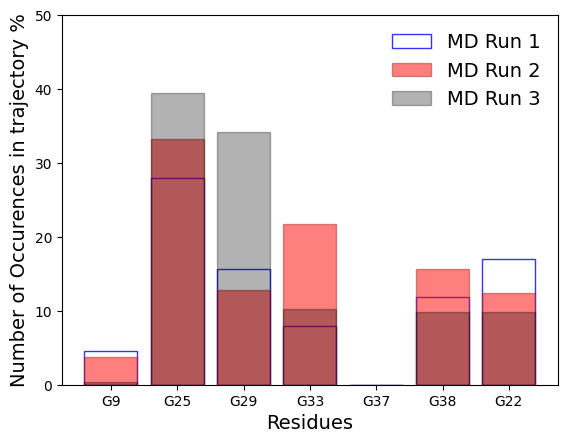

In [58]:
plt.bar(g1.keys() , g1.values(), color='white', alpha=0.8, edgecolor='blue',hatch='', label='MD Run 1')
plt.bar(g2.keys() , g2.values(), color='red', alpha=0.5, edgecolor='brown',hatch='', label='MD Run 2')
plt.bar(g3.keys() , g3.values(), color='black', alpha=0.3, edgecolor='black',hatch='', label='MD Run 3')
plt.xlabel('Residues', fontdict={'family': 'DejaVu Sans', 'size': 14})
plt.ylabel('Number of Occurences in trajectory %', fontdict={'family': 'DejaVu Sans', 'size': 14})
plt.ylim(top=50)
plt.legend(frameon=False, prop={'family': 'DejaVu Sans', 'size': 14})
plt.savefig('histogram_g.png', dpi=600)
plt.show()